In [8]:
import numpy as np
import pandas as pd
import nltk

In [9]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"Message"})
sms.head()

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
print("Number of rows :",len(sms))

Number of rows : 5572


In [12]:
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
sms.describe()

,label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
sms['Length']=sms['Message'].apply(len)
sms.head()

,label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

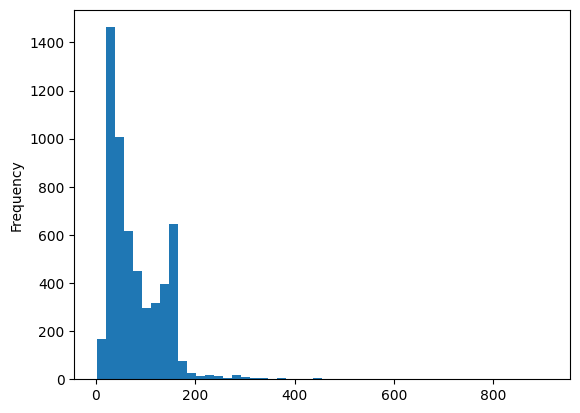

In [16]:
sms['Length'].plot(bins=50,kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

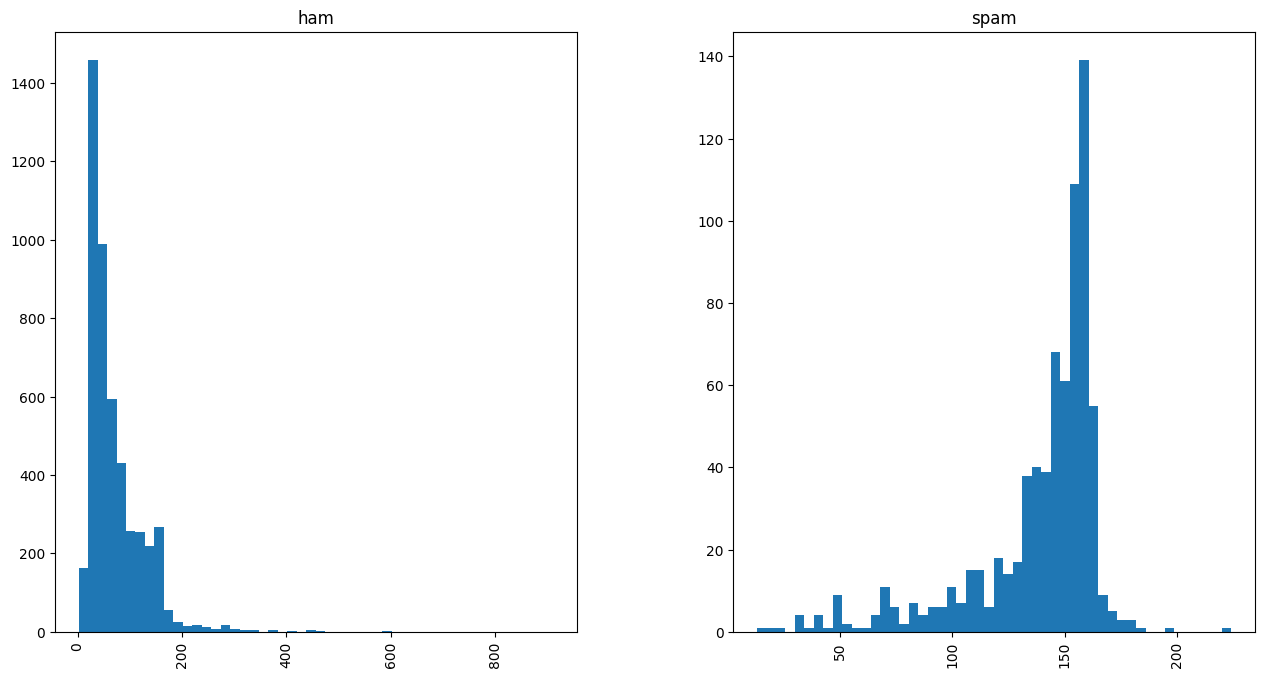

In [17]:
sms.hist(column='Length', by='label' , bins=50 , figsize=(15,8))

In [18]:
sms.loc[:,'label']=sms.label.map({'spam':1,'ham':0})
sms.head()

,label,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
count=CountVectorizer()
x_train, x_test, y_train, y_test = train_test_split(sms['Message'], sms['label'], test_size=0.20, random_state=1)
le = LabelEncoder()
sms['label'] = le.fit_transform(sms['label'])
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sms['Message'])

In [30]:
x_train=count.fit_transform(x_train)
x_test=count.fit_transform(x_test)

In [31]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59357 stored elements and shape (4457, 7774)>

In [32]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [33]:
prediction=model.predict(x_test)

ValueError: X has 3421 features, but MultinomialNB is expecting 7774 features as input.